W=[[0.995    ]
 [1.9950006]], b=[2.9950001], loss=0.00043748487951233983


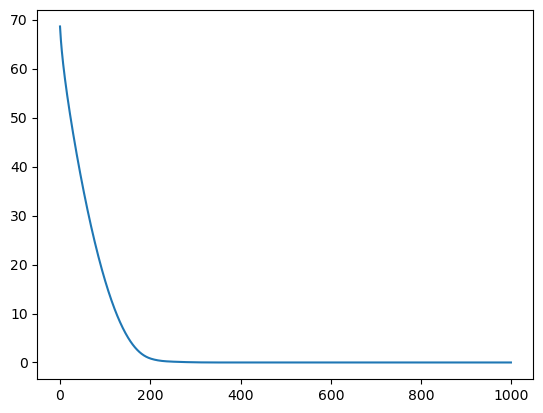

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
    y = tf.matmul(X, W) + b
    return MSE(y, t)
##    return tf.reduce_mean(tf.square(y - t))

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))

# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# opt = tf.keras.optimizers.Adagrad(0.01)
##opt = tf.keras.optimizers.Adam(0.01) 
opt = tf.keras.optimizers.RMSprop(0.01)
     
loss_list = [ ]
for epoch in range(1000):   
    opt.minimize(mse_loss, var_list= [W, b])
    
    loss = mse_loss().numpy()
    loss_list.append(loss)
##    if not epoch % 100:
##            print ("epoch={}: loss={:.5f}".format(epoch, loss))	
                    
print ("W={}, b={}, loss={}".format(
        W.numpy(), b.numpy(), loss))	
plt.plot(loss_list)
plt.show()
